# Evaluation

In [100]:
import ImageHandler as ih
from ImageHandler import cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [101]:
csvFile = 'extracsv'
test_df = pd.read_csv(csvFile)

In [102]:
test_df.head()

,angle,approxAnzahl,areaRatio,circleLike,contureDistance,conturenAnzahl,farPoint,keyPointsAnzahl,mean_val,middlepointDistance,minimal_ratio,minimal_ratio2,momentpointDistance,rectangleLike,seradity,seradity2,solidity,solidity2,steiner,type
0,0,21,1.000000,0.590600,1.089061,1,22955,451,255.000000,-0.478912,2.952970,2.952970,8.000000,1.777962,1.283568,1.283568,0.519200,0.519200,30.149627,Korkenzieher
1,0,19,1.000000,0.482143,1.163095,1,57843,422,255.000000,-4.570877,2.560712,2.560712,-12.000000,1.370308,1.614348,1.614348,0.583190,0.583190,29.206164,Dosenoeffner
2,9,20,0.115538,0.415093,1.068057,3,54321,419,221.479340,-1.867975,2.882889,3.658064,-10.440307,1.108913,1.672003,1.045002,0.656477,0.978868,7.211103,Dosenoeffner
3,28,31,0.026693,0.323231,1.152333,4,46804,455,237.898186,-3.315984,2.022990,2.106280,19.416488,0.600406,1.690849,1.100427,0.592728,0.873852,32.310989,Dosenoeffner
4,2,24,0.123327,0.517205,0.901847,5,11606,414,223.801613,8.401841,3.534759,1.165168,28.301943,1.579323,1.159354,1.154138,0.741148,0.939152,10.816654,Flaschenoeffner


In [103]:
test_df.head(20)

,angle,approxAnzahl,areaRatio,circleLike,contureDistance,conturenAnzahl,farPoint,keyPointsAnzahl,mean_val,middlepointDistance,minimal_ratio,minimal_ratio2,momentpointDistance,rectangleLike,seradity,seradity2,solidity,solidity2,steiner,type
0,0,21,1.000000,0.590600,1.089061,1,22955,451,255.000000,-0.478912,2.952970,2.952970,8.000000,1.777962,1.283568,1.283568,0.519200,0.519200,30.149627,Korkenzieher
1,0,19,1.000000,0.482143,1.163095,1,57843,422,255.000000,-4.570877,2.560712,2.560712,-12.000000,1.370308,1.614348,1.614348,0.583190,0.583190,29.206164,Dosenoeffner
2,9,20,0.115538,0.415093,1.068057,3,54321,419,221.479340,-1.867975,2.882889,3.658064,-10.440307,1.108913,1.672003,1.045002,0.656477,0.978868,7.211103,Dosenoeffner
3,28,31,0.026693,0.323231,1.152333,4,46804,455,237.898186,-3.315984,2.022990,2.106280,19.416488,0.600406,1.690849,1.100427,0.592728,0.873852,32.310989,Dosenoeffner
4,2,24,0.123327,0.517205,0.901847,5,11606,414,223.801613,8.401841,3.534759,1.165168,28.301943,1.579323,1.159354,1.154138,0.741148,0.939152,10.816654,Flaschenoeffner
5,6,32,0.218219,0.292416,1.050468,11,82822,502,184.469530,6.143116,1.465055,2.241164,30.066593,0.290231,2.022747,1.154723,0.583027,0.734025,27.202941,Korkenzieher
6,29,33,0.005416,0.484734,1.351156,17,30424,471,252.323493,-32.464400,1.190207,1.400000,-0.000000,0.839147,1.546789,1.112481,0.403466,0.788344,42.449971,Korkenzieher
7,11,27,0.206482,0.202555,0.939339,14,20000,459,200.917263,2.953837,2.031256,1.857319,-5.000000,0.227792,1.903755,1.234476,0.592643,0.770872,16.124515,Dosenoeffner
8,83,26,0.037624,0.444283,1.128938,3,29763,418,246.367416,5.203339,2.939854,2.631579,31.256999,1.333495,1.486380,1.042379,0.678452,0.897467,16.552945,Flaschenoeffner
9,2,18,0.102716,0.484502,1.095102,2,7794,310,230.201670,6.756757,3.700000,1.562902,29.698485,1.478801,1.113621,1.055117,0.836818,0.927941,10.630146,Flaschenoeffner


In [104]:
test_df.columns 

Index(['angle', 'approxAnzahl', 'areaRatio', 'circleLike', 'contureDistance',
       'conturenAnzahl', 'farPoint', 'keyPointsAnzahl', 'mean_val',
       'middlepointDistance', 'minimal_ratio', 'minimal_ratio2',
       'momentpointDistance', 'rectangleLike', 'seradity', 'seradity2',
       'solidity', 'solidity2', 'steiner', 'type'],
      dtype='object')

In [105]:
test_df.describe()

,angle,approxAnzahl,areaRatio,circleLike,contureDistance,conturenAnzahl,farPoint,keyPointsAnzahl,mean_val,middlepointDistance,minimal_ratio,minimal_ratio2,momentpointDistance,rectangleLike,seradity,seradity2,solidity,solidity2,steiner
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,20.609137,20.791878,0.269853,0.381782,1.133078,4.005076,26737.842640,409.228426,236.788183,14.324175,2.541634,2.342804,33.656559,1.029997,1.348278,1.140944,0.686923,0.845736,23.600416
std,26.501146,6.604137,0.377820,0.164871,0.230713,4.007006,23221.166652,65.581882,19.187695,40.089636,1.088423,2.507189,42.789113,0.557069,0.280318,0.162156,0.172688,0.184870,23.180086
min,0.000000,4.000000,0.000731,0.019988,0.657599,1.000000,304.000000,198.000000,172.435151,-32.464400,1.000000,1.000000,-32.000000,0.081981,1.000000,1.014273,0.278405,0.278405,0.000000
25%,1.000000,17.000000,0.026693,0.284963,0.990159,2.000000,9865.000000,385.000000,226.424212,-0.478912,1.789949,1.334959,10.049876,0.640951,1.110852,1.044608,0.575627,0.788344,9.000000
50%,11.000000,21.000000,0.089591,0.379464,1.117220,3.000000,20000.000000,424.000000,242.222138,5.931396,2.464733,1.680000,26.000000,1.034528,1.289701,1.059382,0.692199,0.935403,16.124515
75%,28.000000,25.000000,0.206482,0.482542,1.227100,5.000000,38144.000000,443.000000,252.835656,13.579287,3.141732,2.143449,44.944410,1.384691,1.557289,1.163097,0.795783,0.971014,30.463092
max,90.000000,38.000000,1.000000,0.846259,2.813427,34.000000,171769.000000,590.000000,255.000000,199.000000,7.932414,28.880518,199.000000,2.615664,2.274445,1.745661,1.000000,0.989643,155.000000


In [106]:
test_df.shape #anzahl Datensätze udn Spalten

(197, 20)

Scatterplot von 2 Merkmalen um Klassifikation zu beurteilen

In [107]:
colors = {'Dosenoeffner':'r','Flaschenoeffner':'g','Korkenzieher':'b'} # Farben für Kategorien

Text(0, 0.5, 'Zweites')

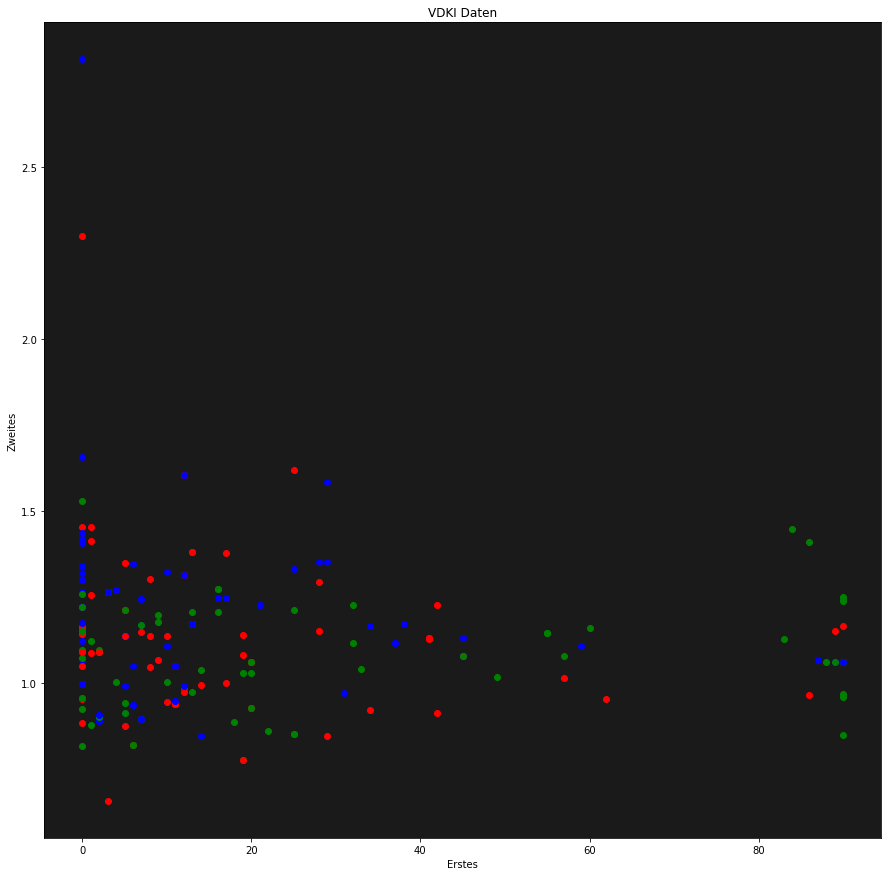

In [108]:
fig, ax = plt.subplots(figsize=(15,15)) #Größe Plot  konfigurieren


for i  in range(len(test_df['type'])):
    ax.scatter(test_df['angle'][i],
               test_df['contureDistance'][i],
               color=colors[test_df['type'][i]])
    
ax.set_title('VDKI Daten')
ax.set_facecolor((0.1,0.1,0.1))
ax.set_xlabel('Erstes')
ax.set_ylabel('Zweites')

Klassen statt mit Namen mit Zahlen bezeichnen

In [109]:
test_original_df = test_df #alten dataframe sichern

In [110]:
type_to_int ={'Dosenoeffner':0,'Flaschenoeffner':1, 'Korkenzieher':2} # Für jede Klasse eindeutige Zahl setzen

test_df['type']=test_df['type'].map(type_to_int) # Klassenspalte überschreiben mit Zahlen
test_df.head()

,angle,approxAnzahl,areaRatio,circleLike,contureDistance,conturenAnzahl,farPoint,keyPointsAnzahl,mean_val,middlepointDistance,minimal_ratio,minimal_ratio2,momentpointDistance,rectangleLike,seradity,seradity2,solidity,solidity2,steiner,type
0,0,21,1.000000,0.590600,1.089061,1,22955,451,255.000000,-0.478912,2.952970,2.952970,8.000000,1.777962,1.283568,1.283568,0.519200,0.519200,30.149627,2
1,0,19,1.000000,0.482143,1.163095,1,57843,422,255.000000,-4.570877,2.560712,2.560712,-12.000000,1.370308,1.614348,1.614348,0.583190,0.583190,29.206164,0
2,9,20,0.115538,0.415093,1.068057,3,54321,419,221.479340,-1.867975,2.882889,3.658064,-10.440307,1.108913,1.672003,1.045002,0.656477,0.978868,7.211103,0
3,28,31,0.026693,0.323231,1.152333,4,46804,455,237.898186,-3.315984,2.022990,2.106280,19.416488,0.600406,1.690849,1.100427,0.592728,0.873852,32.310989,0
4,2,24,0.123327,0.517205,0.901847,5,11606,414,223.801613,8.401841,3.534759,1.165168,28.301943,1.579323,1.159354,1.154138,0.741148,0.939152,10.816654,1


Daten Visualieren, Merkmale und Kategorien

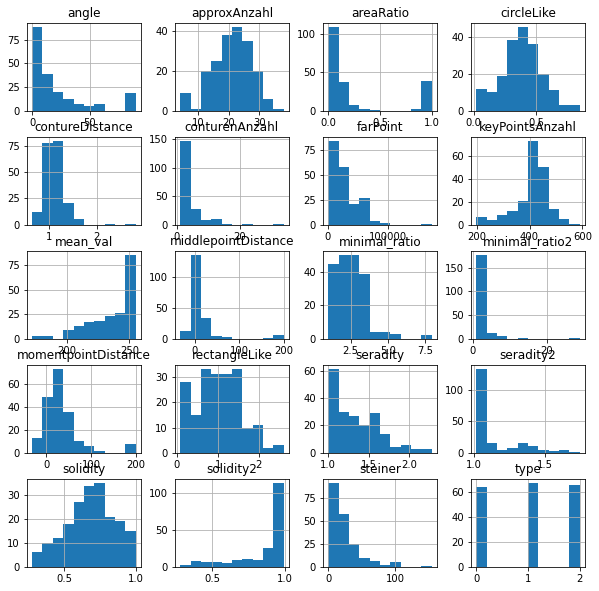

In [111]:
test_df.hist(figsize=(10,10)) #berechnet Histogramme aller Spalten
plt.show()

Scattermatrix erstellen als schnellen Überblick

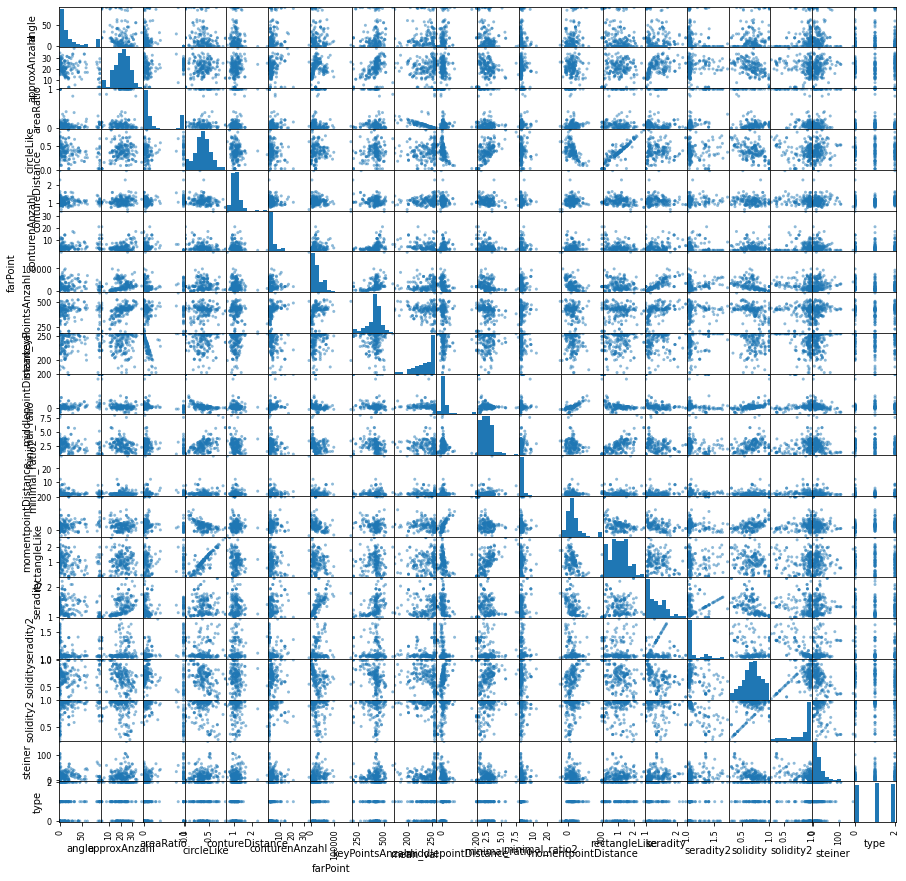

In [112]:
from pandas.plotting import scatter_matrix
scatter_matrix(test_df,figsize=(15,15))
plt.show()

Erzeuge Trainings- und Testdaten
1. Erzeuge eine Dataframe mit allen Merkmalen, aber nicht der Kategorie (Letzte Spalte)
2. Erzeuge eine Dataframe nur mit der Kategorie (letzte Spalte)

In [113]:
X = test_df.iloc[:,:-1] #alles außer letzter Spalte
y = test_df.iloc[:,-1] #nur letzte Spalte
print('X: ',X.shape, ' y: ',y.shape)

X:  (197, 19)  y:  (197,)


In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                   random_state=42)

print('X_train: ', X_train.shape, ' y_train: ',y_train.shape)
print('X_test: ', X_test.shape, ' y_test: ', y_test.shape)

X_train:  (157, 19)  y_train:  (157,)
X_test:  (40, 19)  y_test:  (40,)


Bayes Klassifikator

In [115]:
from sklearn.naive_bayes import GaussianNB # importiere Bayes-Klassifikator
bayes_clf = GaussianNB()
bayes_clf.fit(X_train,y_train) #Wende Klassifikator auf Trainingsdaten an

print('Accuracy Bayes: ', bayes_clf.score(X_test, y_test))

Accuracy Bayes:  0.375


Accuracy = 1: Kann komplett genau klassifizieren

Weitere Maße außer Accuracy:

In [116]:
from sklearn.metrics import confusion_matrix

y_pred = bayes_clf.predict(X_test) #nimm Testdaten als Vorhersagedaten

print(confusion_matrix(y_test, y_pred))

[[2 1 5]
 [2 7 8]
 [4 5 6]]


In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.25      0.25         8
           1       0.54      0.41      0.47        17
           2       0.32      0.40      0.35        15

    accuracy                           0.38        40
   macro avg       0.37      0.35      0.36        40
weighted avg       0.40      0.38      0.38        40



Entscheidungsbaum

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

tree_clf = DecisionTreeClassifier()

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [119]:
print('Accuracy Decision Tree', tree_clf.score(X_test,y_test)) # Accuracy nach Generalisierung

Accuracy Decision Tree 0.3


[Text(84.6870283018868, 207.55636363636364, 'X[12] <= -4.975\ngini = 0.666\nsamples = 157\nvalue = [56, 50, 51]'),
 Text(18.950943396226414, 187.7890909090909, 'X[1] <= 28.0\ngini = 0.156\nsamples = 24\nvalue = [22, 1, 1]'),
 Text(12.633962264150943, 168.0218181818182, 'X[10] <= 3.477\ngini = 0.083\nsamples = 23\nvalue = [22, 1, 0]'),
 Text(6.316981132075472, 148.25454545454545, 'gini = 0.0\nsamples = 21\nvalue = [21, 0, 0]'),
 Text(18.950943396226414, 148.25454545454545, 'gini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(25.267924528301887, 168.0218181818182, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(150.42311320754717, 187.7890909090909, 'X[14] <= 1.163\ngini = 0.658\nsamples = 133\nvalue = [34, 49, 50]'),
 Text(72.64528301886793, 168.0218181818182, 'X[11] <= 1.685\ngini = 0.598\nsamples = 60\nvalue = [18, 32, 10]'),
 Text(31.58490566037736, 148.25454545454545, 'X[7] <= 248.0\ngini = 0.464\nsamples = 30\nvalue = [4, 21, 5]'),
 Text(25.267924528301887, 128.48727272727274,

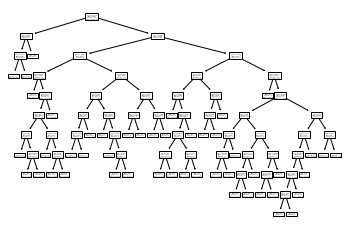

In [120]:
tree.plot_tree(tree_clf)

Decision Tree anwenden

In [121]:
y_pred = tree_clf.predict(X_test) #Vorhesage der X_testdaten erzeugen
# hier könnten statt X_test auch andere Dataframes stehen

from sklearn.metrics import accuracy_score

print('Accuracy:', accuracy_score(y_test,y_pred)) #Vergleich Prädiktion mit Test

Accuracy: 0.3


In [122]:
X_testDf = pd.DataFrame([[4, 1.0, 7.227413533394955e-05, 100.14478364620715, 451.34743539649344, 0.995000031094334, 0, 520, 4.710005224010548, 199.0, 1.0, 200.0, 7.227413533394955e-05,1.0, 1.4142135623730951]],columns=['approxAnzahl', 'bounding_ratio', 'circleLike', 'circularity',
       'equi_diameter', 'extent', 'farPoint', 'keyPointsAnzahl', 'mean_val',
       'middlepointDistance', 'minimal_ratio', 'momentpointDistance',
       'rectangleLike', 'solidity', 'steiner'])
y_pred = tree_clf.predict(X_testDf)

ValueError: X has 15 features, but DecisionTreeClassifier is expecting 19 features as input.

In [ ]:
print('Vorhergesagte Kategorie: ',y_pred)

In [ ]:
y_pred_bayes = bayes_clf.predict(X_testDf)
print('Vorhergesagte Kategorie mit Bayes: ',y_pred_bayes)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=2)

forest_clf.fit(X_train,y_train)

In [ ]:
y_pred_rf = forest_clf.predict(X_test)
print('Accuracy Random Forest: ', accuracy_score(y_test,y_pred_rf))